# TEST, TEST, TEST: Optimizing the pooling test strategy

## TL;DR

The best strategy to use for doing a [pooled test on COVID-19](https://aktuelles.uni-frankfurt.de/englisch/pool-testing-of-sars-cov-02-samples-increases-worldwide-test-capacities-many-times-over/) is shown in the table bellow:

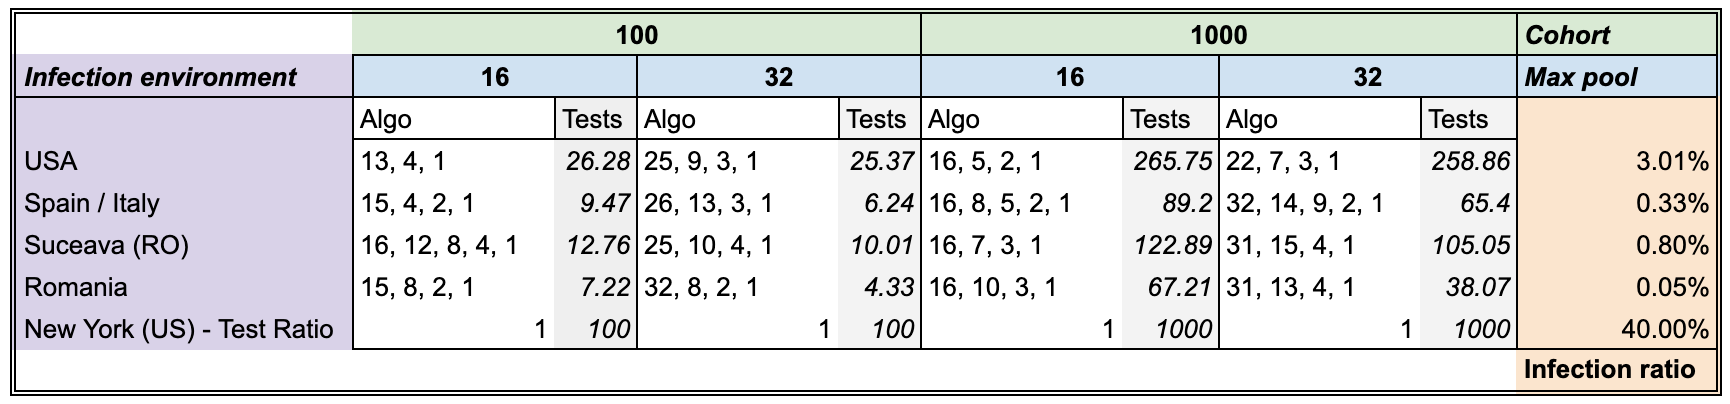

What this table essentially says is that for the case of `Italy` for example, where there is an expected `0.33%` infection rate among the full population, the optimal strategy for testing 100 people (`cohort size`), where you are allowed a maximum of 16 samples per pool, is to test:
* first in groups of 15
* the remaining people in the positive groups, regrouped in groups of 4
* the remaining people in the positive groups, regrouped in groups of 2
* the remaining people, individually 

So, a 4 step strategy of (15, 4, 2, 1) where you should expect, on average, to find all the infections using only 9.47 tests! 

**That means an approximately 10x increase in capacity!**  

## Argument

It's no doubt that `COVID-19` already made a great impact on us all. [Stopping this pandemic](https://www.imperial.ac.uk/media/imperial-college/medicine/sph/ide/gida-fellowships/Imperial-College-COVID19-Global-Impact-26-03-2020v2.pdf) is a challenge that may prove to hard in the end, but if one strategy has shown significant results in halting (and even reversing this disease), this has been to quarantine infected people.

I'll leave you to watch this excellent simulation from [3Blue1Brown](https://www.3blue1brown.com/) bellow that outlines different prevention strategies and their outcome, which prove the point above.

<iframe width="560" height="315" src="https://www.youtube-nocookie.com/embed/gxAaO2rsdIs" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

The problem with quarantines though is that you need to know which persons are infected, and to know that, you need to do tests, lots of tests! 

> We have a simple message for all countries: **test, test, test**. (*WHO Director-General's opening remarks at the media briefing on COVID-19 - 16 March 2020*)


At the same time, tests are a limited resource and most countries have fewer tests than they need. 

Romania for example only made 113.336 tests for a population of 19.6 million inhabitants, which means a [0.585% testing rate](https://ourworldindata.org/what-can-data-on-testing-tell-us-about-the-pandemic), for a total daily capacity of 8000 tests / day. This is clearly insufficient for a comprehensive testing scenario, that would ensure the success of a quarantining effort. 

<iframe src="https://ourworldindata.org/grapher/number-of-covid-19-tests-per-confirmed-case?time=2020-04-23&country=ROU+POL+ISL+United%20Kingdom%2C%20tests%20performed+DEU+FRA+ITA" style="width: 100%; height: 600px; border: 0px none;"></iframe>

## Pooled testing

Recently, test pooling [has been suggested](https://aktuelles.uni-frankfurt.de/englisch/pool-testing-of-sars-cov-02-samples-increases-worldwide-test-capacities-many-times-over/) by the Frankfurt Goethe University where you test a group of nasal samples, all in a single test. If the test is negative this means all the samples in the group (pool) were negative, sparing a lot of unnecessary individual tests.

By testing in this way, you can reduce the amount of tests needed by at least an order of magnitude. Or putting it in another way, **you increase the testing capacity by an order of magnitude**!

This seems to work because the following assumptions are valid:
* there are a lot more healthy people (that would have negative samples) than infected people (ones with positive samples)
* a single positive sample is sufficient to make the whole pooled test, positive.

To give you a concrete example of how this might work, look at the image bellow:

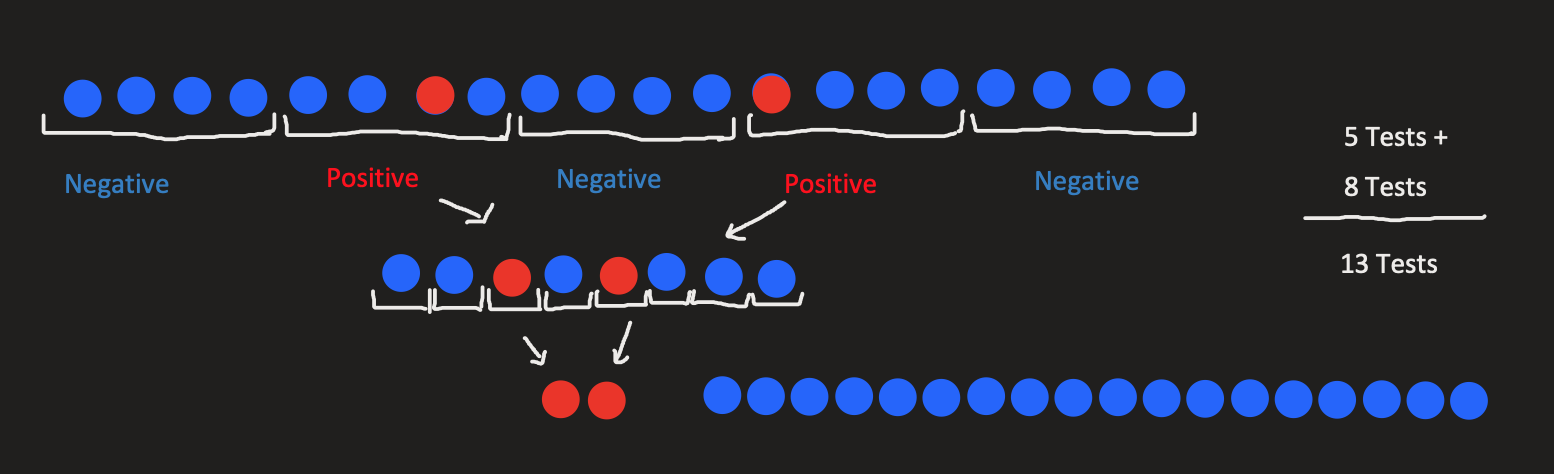

We start with 20 suspect patients, we pool them in groups of 4 and the positive (infected) pools, we test each case individually. 

So instead of 20 tests (going with the naive approach of testing everyone separately) we've only made 13 tests. This means a reduction of 35% of tests needed!

Also, note that this examples has a 10% `infection ratio` (which is a bit unrealistic at the moment, for `COVID-19`). If we only had 1 infected patient (equivalent to a 5% infection ratio) we would only need 9 tests, so a **55% reduction**. 

## Optimizing the pooled strategy

It may be obvious from the above example that the pool size has a big impact on the total number of tests conducted:
* if the pool is too large (say 10 in our example), we end up with most (all, in our case) pooled tests ending up positive, essentially wasting these tests because only a few pools were eliminated.
* if the pool size is too small (say 2) we do way to many tests (in our example we'd do 14 total tests, compared to 13 for pool size of 4). 

Generically speaking, the `pool size` is dependent on both the `cohort size` (the number of tested people) and the expected `infection ratio` 

> The question is thus, what is the optimal pool size? (given both of these parameters)

To make it even more generic, it many not even be optimal to test using a shallow strategy. If you look back at the example, we had a strategy with two steps:
* test in groups of 4
* test in groups of 1

For a specific `infection ratio` and `cohort size` there might be an optimal strategy that requires 3 or more steps for an optimal strategy, for example testing in pools of 10, then in pools of 3, then individually (in pools of 1). 

So we can rephrase our goal as:

> **Given a certain context (with a known expected `infection ratio` and `cohort size`) what is the overall best pooled testing strategy that ensures finding all the infected people with the minimum amount of testing required**  

## Results

I'll first present the results, to spare some readers from having to search for it at the end, and then continue with the methodology and some later discussions.

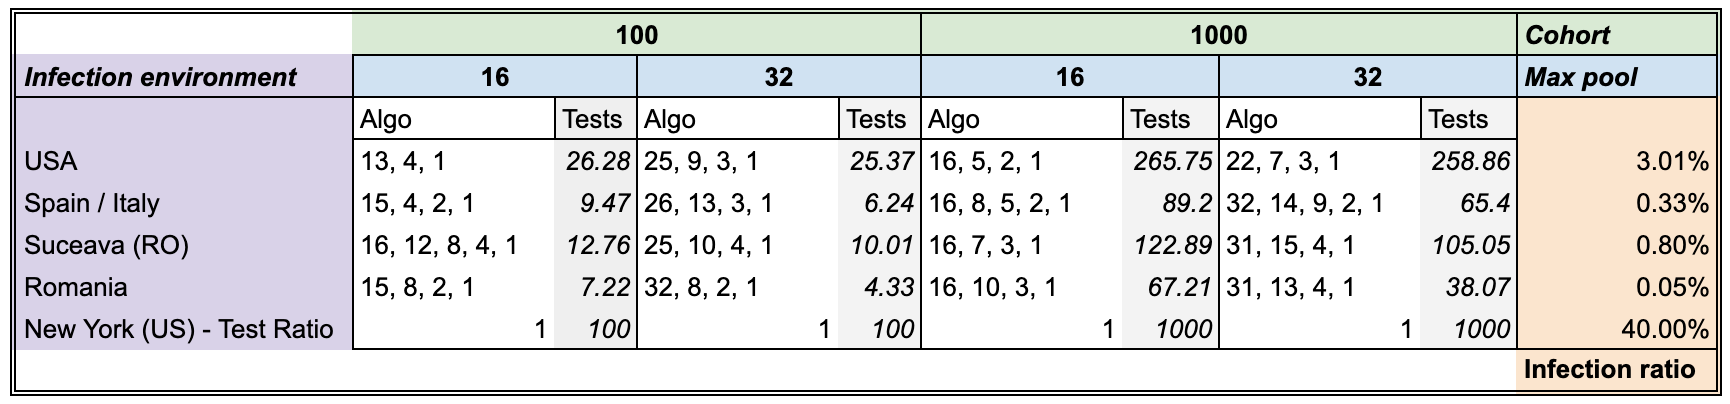

What this table essentially says is that for the case of `Italy` for example, where there is an expected `0.33%` infection rate among the full population, the optimal strategy for testing 100 people (`cohort size`), where you are allowed a maximum of 16 samples per pool, is to test:
* first in groups of 15
* the remaining people in the positive groups, regrouped in groups of 4
* the remaining people in the positive groups, regrouped in groups of 2
* the remaining people, individually 

So, a 4 step strategy of (15, 4, 2, 1) where you should expect, on average, to find all the infections using only 9.47 tests! 

**That means an approximately 10x increase in capacity!**  

## Methodology

### Monte Carlos simulations: Evaluating a strategy
We've used [Monte Carlo simulations](https://en.wikipedia.org/wiki/Monte_Carlo_method) for estimating the `expected average number of tests` for a specific strategy. This means we've randomly generated for each case, 1000 random arrangements of test samples, drawn from the known `infection ratio` for that test. 

Say we have certain `S` strategy fixed.

So for the `Spain` setup, where we have an expected infection ratio of 0.33% we've generated 1000 random boolean arrays where the `True` values (encoding the infections) had a probability of 0.33% appearing, while the `False` values (encoding the healthy) had a probability of 1 - 0.33% appearing. 

On each of the 1000 cases we applied the strategy `S` and observed the required number of tests needed to find all the infections. 

*Note*: In order to make sure we have this property (correctly identifying each infection), each strategy needs to end in a pool size of 1 step.

### Genetic Algorithm: Finding good strategies

We've set the maximum number of possible steps in a strategy (the number of pooling steps) to be 5, where as noted above, the last one is always a size 1 pool.

As such the search space for all the possible solutions is of size 2^25. Doing a brute force search on it, in conjunction with the monte carlo simulations and for multiple configurations and setups meant that this would take a very very long time to have some results.

Instead we've optimized the problem using a [genetic algorithm](https://en.wikipedia.org/wiki/Genetic_algorithm):
* It uses a proportional mix of `elitism` and `tournament selection` for the `cross over` step
* A `mutation chance` of 5% on the `mutation` step
* The fitness value is the `expected average test` resulted from the monte carlo simulation
* The population had 100 individuals
* The search was stopped after 20 generations where no new best solutions could be found (early stopping with a patience of 20 epochs)

Each setup required on average 12 generation to find the best solution, so along with the early stopping condition that meant 32 generation on average for it to finish. This was a dramatic improvement over the 2^25 steps brute force required.


# Discussions 

There are a number of limitations and possible improvements to the way that we've modeled the testing problem:
* First of all, we do not account for what happens to how pooled test behave where one of the individuals, tested separately would be an `inconclusive` case (worse case being that on a retest he's shown to be positive). We suspect (hope) that a single `inconclusive` sample in a pool would make the whole pool `inconclusive` as well, otherwise this pooling method might not work, regardless of the strategy.
* The `infection ratios` above might not be accurate. We've done only some limited computations using the data provided at the [John's Hopkins COVID-19 Dashboard](https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6). If some numbers are inaccurate of you'd like to include other cases as well, we'd be more than happy to rerun the simulations and update the table above.
